Refined Research Question:

How does limited access to grocery stores in low-income communities, particularly communities of color, contribute to disparities in obesity rates in the United States?

Rationale for Refinement: 

The refined research question now explicitly highlights the social justice aspect by incorporating communities of color. This adjustment emphasizes the historical and systemic inequalities faced by marginalized populations, particularly in relation to access to nutritious food. The new question brings attention to how geographic and economic barriers disproportionately affect these communities' health outcomes, aligning with a social justice lens.

Preliminary Data Analysis:

From the exploration of the datasets, it is clear that food deserts—areas where access to fresh, affordable, and nutritious food is limited—are more prevalent in low-income and minority communities. The Food Access Research Atlas provides valuable insight into areas with limited access to grocery stores, while the Behavioral Risk Factor Surveillance System (BRFSS) data sheds light on obesity rates across various communities.

Key Variables:

Food Access Data (Food Desert Severity): We created a new variable to measure food desert severity based on the distance to grocery stores. This new column categorizes the level of food access into four groups:

0: No limited access (reference group)
1: Limited access within 1 mile
2: Limited access within ½ mile
3: Severe food desert (both 1-mile and ½-mile access limitations)
Health Outcome Data (Obesity Prevalence): This dataset provides obesity prevalence rates across different regions, stratified by various factors such as race/ethnicity, income, and age.

Visualization:

In [11]:
import os
print(os.listdir())

['.Rhistory', 'Lab1.Rmd', '.config', 'Music', '.condarc', '.DS_Store', 'cleaned_health_outcome_data.csv', '.CFUserTextEncoding', 'Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20250213.csv', '.xonshrc', 'fd2dbace-3737-c713-a4b7-42dcddc25e7f.png', 'anaconda_projects', 'Untitled.ipynb', '.zshrc', '.local', 'Pictures', '.zprofile', 'Commit3.ipynb', '.zsh_history', '.ipython', 'Desktop', 'Library', '.matplotlib', 'Commit 2 Updated.ipynb', 'Public', '.idlerc', '.tcshrc', '.RData', '.anaconda', 'cleaned_food_access_data.csv', 'Movies', '.Rapp.history', '.Trash', '.ipynb_checkpoints', 'FoodAccessResearchAtlasData2019.csv', '.jupyter', 'Documents', 'cleaned_health_outcome_data1.csv', '.bash_profile', 'Downloads', '.python_history', '.continuum', 'cleaned_food_access_data1.csv', '.zsh_sessions', 'Assignment1.ipynb', '.conda']


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the datasets
food_access_data = pd.read_csv("FoodAccessResearchAtlasData2019.csv")
food_access_data.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [17]:
health_outcome_data = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20250213.csv")
health_outcome_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [23]:
print(food_access_data.columns)
print(health_outcome_data.columns)

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=147)
Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Sex', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


In [41]:
merged_data = pd.merge(food_access_data, health_outcome_data, left_on="CensusTract", right_on="LocationID")

In [43]:
print(food_access_data['CensusTract'].isnull().sum())
print(health_outcome_data['LocationID'].isnull().sum())

0
0


In [53]:
print(low_income_data.columns)

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'LocationID', 'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object', length=180)


In [45]:
# Filter for low-income areas by examining SNAP participation (as a proxy for low-income)
low_income_data = merged_data[merged_data['TractSNAP'] > 0]

<Axes: >

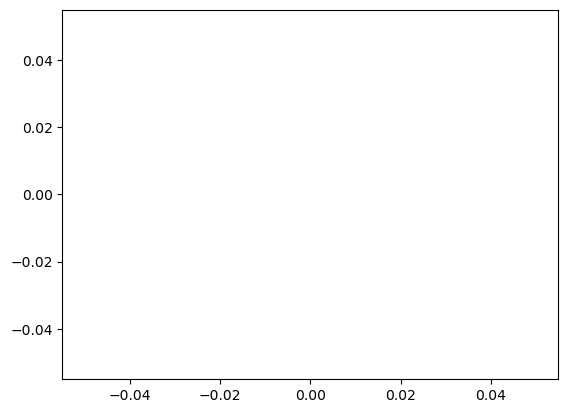

In [80]:
sns.scatterplot(data=low_income_data, x='Income', y='Race/Ethnicity', legend=False)

/var/folders/c4/mwls6lk56m99nbxsclf1gczc0000gp/T/ipykernel_92472/3056176597.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=low_income_data, x='Income', y='Race/Ethnicity', hue='State', palette='coolwarm')
/var/folders/c4/mwls6lk56m99nbxsclf1gczc0000gp/T/ipykernel_92472/3056176597.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Income vs Race/Ethnicity in Low-Income Communities')


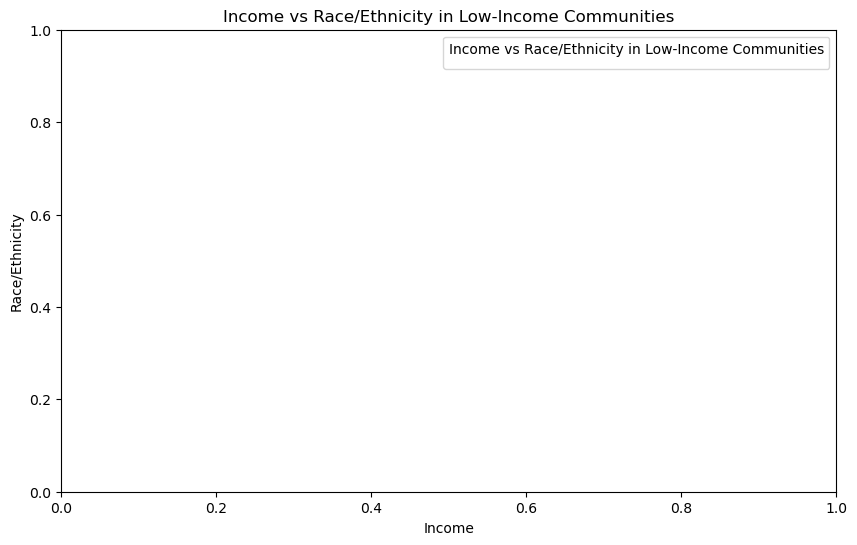

In [84]:
# Scatter plot of income vs obesity prevalence, colored by food access severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=low_income_data, x='Income', y='Race/Ethnicity', hue='State', palette='coolwarm')
plt.title('Income vs Race/Ethnicity in Low-Income Communities')
plt.xlabel('Income')
plt.ylabel('Race/Ethnicity')
plt.legend(title='Income vs Race/Ethnicity in Low-Income Communities')
plt.show()
